In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
def prophet_model(df, metric):
    p_df = df[["date", metric]].rename(columns={"date": "ds", metric: "y"})
    model = Prophet()
    model.fit(p_df)
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)
    model.plot(forecast)
    plt.title(f"Prophet Trend for {metric}")
    plt.show()
    return forecast

def clustering(features_csv):
    features = pd.read_csv(features_csv, index_col=0)

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(features_scaled)

    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(reduced)

    plt.scatter(reduced[:, 0], reduced[:, 1], c=kmeans_labels)
    plt.title("KMeans Behavioral Clustering")
    plt.show()

    dbscan = DBSCAN(eps=0.8, min_samples=5)
    dbscan_labels = dbscan.fit_predict(reduced)

    plt.scatter(reduced[:, 0], reduced[:, 1], c=dbscan_labels)
    plt.title("DBSCAN Behavioral Clustering")
    plt.show()


23:57:50 - cmdstanpy - INFO - Chain [1] start processing
00:00:42 - cmdstanpy - INFO - Chain [1] done processing


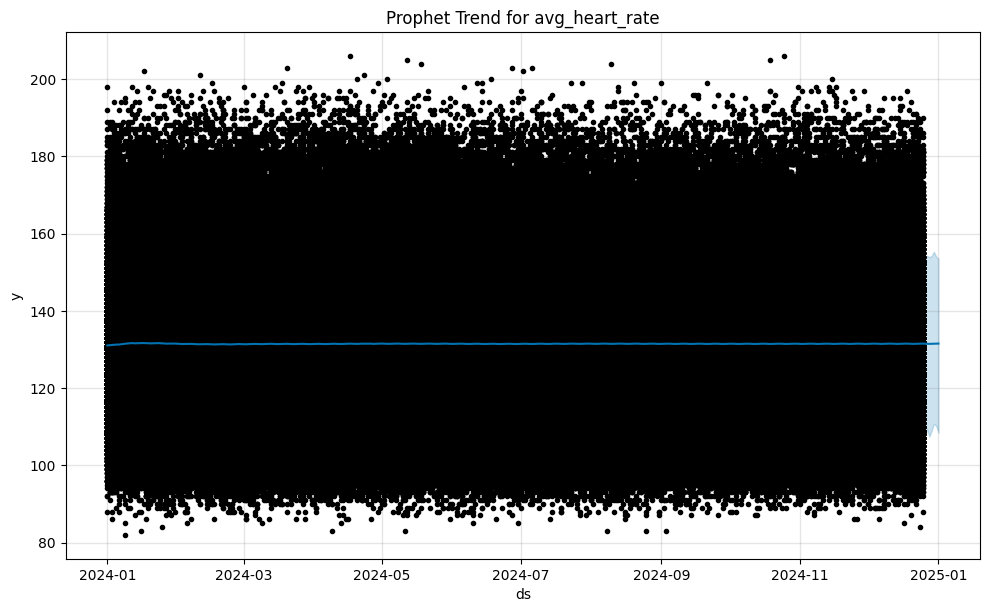

00:01:27 - cmdstanpy - INFO - Chain [1] start processing
00:04:17 - cmdstanpy - INFO - Chain [1] done processing


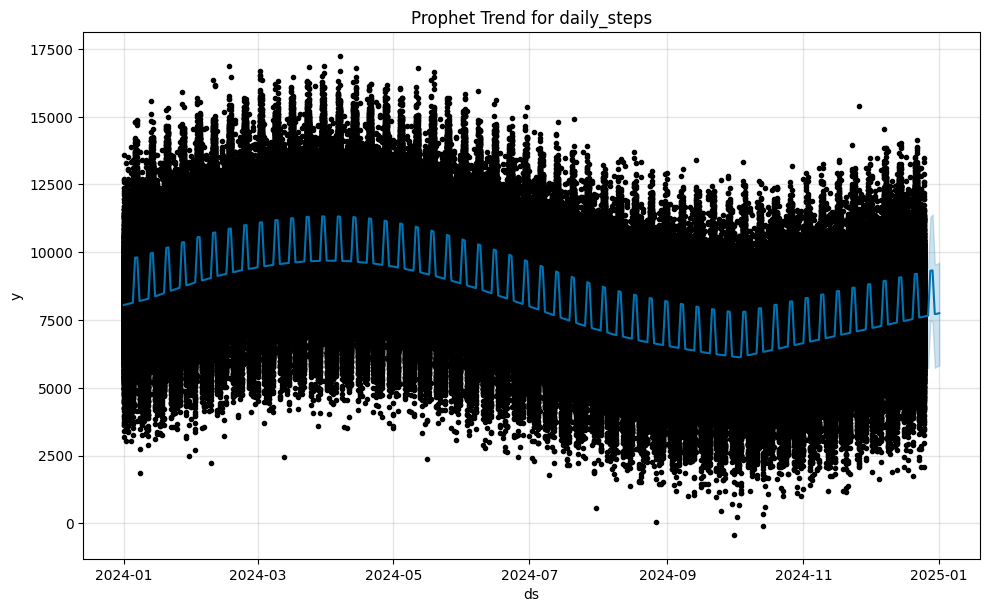

00:05:00 - cmdstanpy - INFO - Chain [1] start processing
00:05:52 - cmdstanpy - INFO - Chain [1] done processing


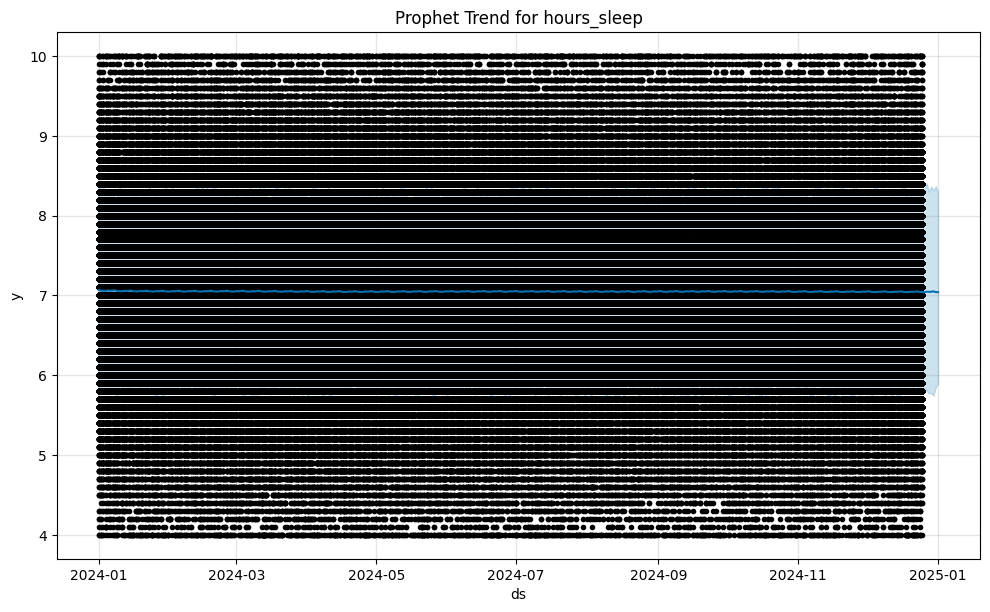

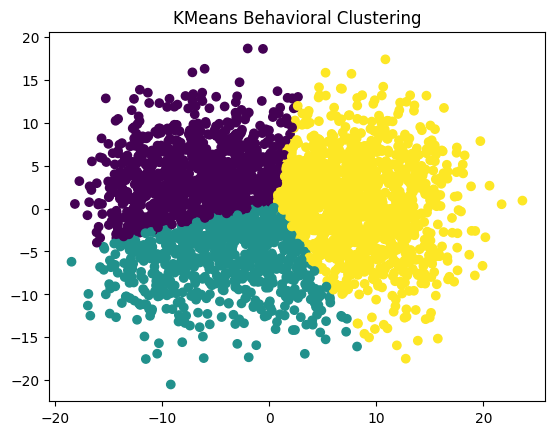

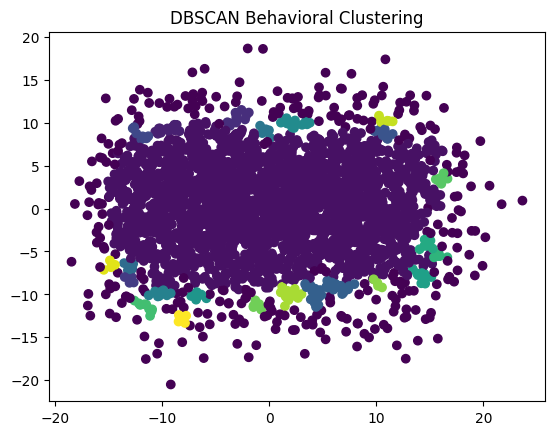

In [5]:
df = pd.read_csv("data/cleaned_health_fitness_data.csv")
df["date"] = pd.to_datetime(df["date"])

prophet_model(df, "avg_heart_rate")
prophet_model(df, "daily_steps")
prophet_model(df, "hours_sleep")

clustering("data/tsfresh_features.csv")